In [ ]:
# Task 1: Theory Questions


# 1. What is the core assumption of Naive Bayes?
# Naive Bayes assumes that the features are conditionally independent given the class label. This means the presence or absence of a feature does not affect the others in predicting the class.


# 2. Differentiate between GaussianNB, MultinomialNB, and BernoulliNB.

# GaussianNB: Used for continuous numeric data, assumes features follow a Gaussian distribution.

# MultinomialNB: Best for discrete count data like word frequencies in text classification.

# BernoulliNB: Designed for binary/boolean features, like presence or absence of a word.


# 3. Why is Naive Bayes considered suitable for high-dimensional data?
# Naive Bayes is computationally efficient, requires a small amount of training data, and performs well in high-dimensional feature spaces like text data, because of the independence assumption simplifying the model.

In [2]:
# Task 2: Spam Detection using MultinomialNB

from sklearn.datasets import fetch_openml
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Load dataset (SMS Spam Collection)
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', names=["label", "message"])

# Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Vectorize
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9668161434977578
Precision: 1.0
Recall: 0.7516778523489933
Confusion Matrix:
 [[966   0]
 [ 37 112]]


In [4]:
# Task 3: GaussianNB with Iris/Wine Dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load data
data = load_iris()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Compare
print("GaussianNB:\n", classification_report(y_test, y_pred_gnb))
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))


GaussianNB:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Task 4: Conceptual Questions 
# 1. What is entropy and information gain?
# Entropy measures the impurity or disorder in the dataset. Information gain quantifies the reduction in entropy after a dataset is split on a feature.

# 2. Difference between Gini Index and Entropy?
# Both measure impurity, but:

# Gini is faster and preferred in practice.

# Entropy uses logarithms, and may give different splits.
# Gini ranges from 0 (pure) to 0.5 (impure); entropy ranges from 0 to 1.

# 3. How can a decision tree overfit? How can this be avoided?
# Overfitting happens when the tree is too deep, capturing noise. Avoid it by pruning, setting max_depth, or increasing min_samples_split.

Accuracy: 0.7255813953488373
Confusion Matrix:
 [[94 33]
 [26 62]]


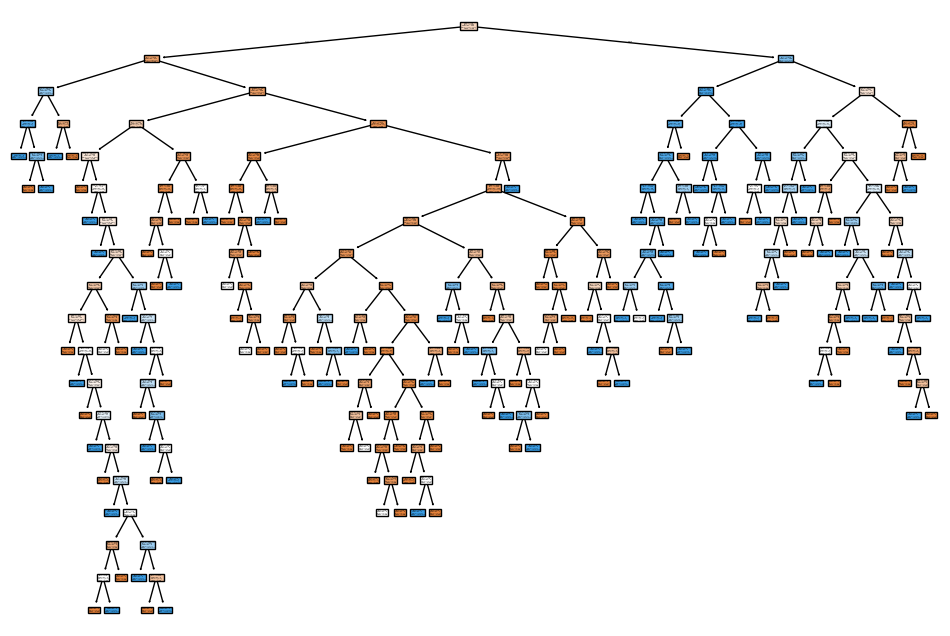

In [6]:
# Task 5: Decision Tree on Titanic Dataset
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load data
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()


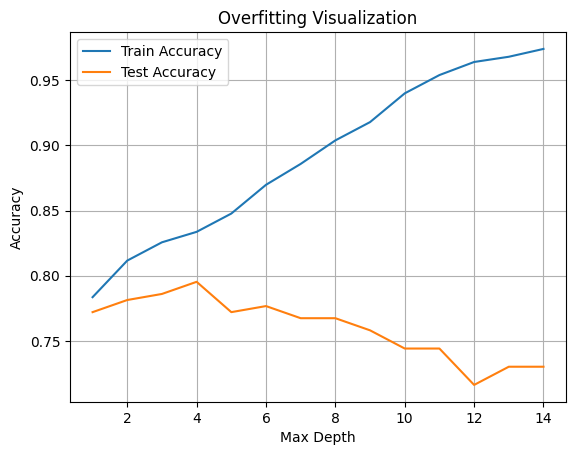

In [8]:
# Task 6: Model Tuning
import numpy as np

depths = list(range(1, 15))
train_acc, test_acc = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

# Plot
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Visualization")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Task 7: Conceptual Questions
# 1. Difference between Bagging and Boosting?

# Bagging builds models in parallel to reduce variance (e.g., Random Forest).

# Boosting builds models sequentially, focusing on correcting previous errors to reduce bias.

# 2. How does Random Forest reduce variance?
# It averages multiple decision trees trained on random data subsets and features, reducing overfitting and variance.

# 3. Weakness of boosting-based methods?
# Boosting is sensitive to noisy data and outliers, and can overfit if not regularized properly.

Random Forest Accuracy: 0.8
Random Forest Precision: 0.7710843373493976
Random Forest Recall: 0.7272727272727273


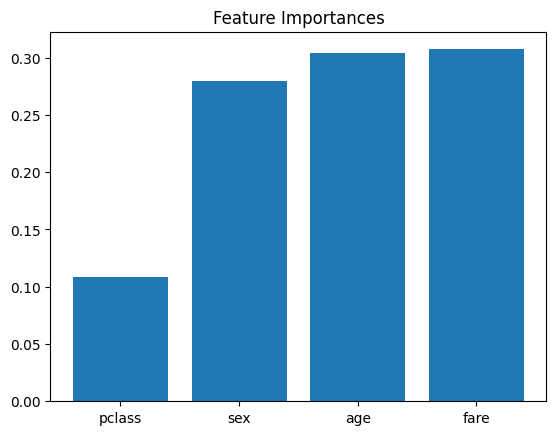

In [10]:
# Task 8: Random Forest vs Decision Tree
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))

# Feature importances
importances = rf.feature_importances_
plt.bar(X.columns, importances)
plt.title("Feature Importances")
plt.show()


In [11]:
# Task 9: AdaBoost or Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import time

# AdaBoost
start = time.time()
ada = AdaBoostClassifier(n_estimators=50, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
end = time.time()

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))
print("Training Time:", round(end - start, 2), "s")

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))


C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7906976744186046
F1 Score: 0.7272727272727273
Training Time: 0.17 s
Gradient Boosting Accuracy: 0.8232558139534883
F1 Score: 0.7625
